<a target="_blank" href="https://colab.research.google.com/github/paulotguerra/QXD0046/blob/main/00.01-Linguagens-Formais-e-Automatos.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## QXD0046 - Teoria da Computação
# Revisão: Linguagens Formais e Autômatos
**Professor**: Paulo de Tarso Guerra ([paulodetarso@ufc.br](mailto:paulodetarso@ufc.br))

In [1]:
# Execute essa célula (`ctrl+enter` ou clicando no botão de play) para importar a implementação das classes diretamente do [GitHub](https://github.com/paulotguerra/QXD0046)

![ -d teocomp ] || (git clone https://github.com/paulotguerra/QXD0046.git && cp -r QXD0046/teocomp . && rm -rf QXD0046)

# Autômato Finito Determinístico

Os **autômatos finitos determinísticos** (AFD) são modelos de computação que representam o que chamamos de máquina de estados: uma representação conceitual da dinâmica de execução de um computador perante uma determinada entrada. Os AFDs autômatos são capazes de realizar tarefas simples, como reconhecer ou não cadeias de uma linguagem.

Graficamente, descrevemos um AFD por meio de uma representação de círculos, representando estados, ligados por arestas rotuladas, que descrevem os elementos motivam a transição de estados.

**Figura 1**: Exemplo de diagrama de estados de um AFD.

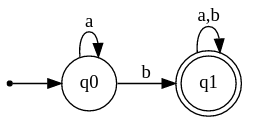

A figura acima representa um autômato com dois estados, `q0` e `q1`. O autômato inicia no estado `q0`, indicado por uma seta sem origem em outro estado. Os rótulos das setas indicam os possíveis fatos motivadores de uma mudança de estado. 

Por exemplo, no estado `q0`, a leitura de um símbolo `b` faz com que o autômato altere seu estado de `q0` para `q1`. Neste mesmo estado, porém, a leitura de um símbolo `a` não desencadeia a mudança para outro estado, permanecendo em `q0`. O autômato aceita uma cadeia se após as transições ele parar em no estado de aceitação `q1`, indicado na figura por um duplo círculo.

Os AFDs são formalmente definidos como segue:

**Definição 1**: Um autômato finito determinístico é uma tupla $(Q, \Sigma, \delta, q_0, F)$, onde:
1. $Q$ é um conjunto finito de símbolos de estado,
1. $\Sigma$ é um conjunto finito de símbolos de alfabeto,
1. $\delta : Q \times \Sigma \rightarrow Q$ é a função de transição,
1. $q_0 \in Q$ é o estado inicial, e
1. $F \subseteq Q$ é o conjunto de estados de aceitação.

Podemos definir o AFD ilustrado na Figura 1 formalmente como

$$M = (\{q_0,q_1\}, \{a,b\}, \delta, q_0, \{q_1\})$$

onde $\delta(q_0,a)=q_0, \delta(q_0,b)=q_1, \delta(q_1,a)=q_1 $ e $\delta(q_1,b)=q_1$.

Seja $M = (Q, \Sigma, \delta, q_0, F)$ um AFD e $w = w_1w_2...w_n$ uma cadeia sobre $\Sigma$, dizemos que $M$ **aceita** $w$ se existe uma sequência $(s_0,s_1,...,s_n)$ tal que
1. $s_0 = q_0$,
1. $s_{i+1} = \delta(s_i,w_{i+1})$, para $0 \leq i < n$,
1. $s_n \in F$.

Por exemplo, o AFD $M$ ilustrado na Figura 1 aceita a cadeia $w = aabb$, dado que a sequência (q0, q0, q1, q1) satisfaz as condições acima.

## Implementação em Python

Em nossa implementação, um autômato finito determinístico é representado pela classe `AFD`, cujo construtor segue a definição apresentada:

`M = AFD(Q,Sigma,delta,q0,F)`

A seguir temos o exemplo do AFD da Figura 1. Os elementos `Q`, `Sigma` e `F` são elementos do tipo `set()`. O elemento `q0` deve ser um elemento de `Q`. A função de transição `delta` é um elemento do tipo `dict()` cuja construção deve ter domínio e contradomínio como indicado na Definição 1.

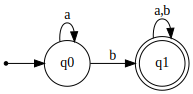

In [2]:
from teocomp.automata import AFD

Q = {'q0','q1'}
Sigma = {'a','b'}
delta = {('q0','a'):'q0',
         ('q0','b'):'q1',
         ('q1','a'):'q1',
         ('q1','b'):'q1'}
q0 = 'q0'
F = {'q1'}

M = AFD(Q,Sigma,delta,q0,F)
M

O diagrama de estados é gerado utilizando da biblioteca [`graphviz`]().

Definido o autômato `M`, podemos usar a função `M.aceita(entrada)` para verificar a aceitação de cadeias, onde `entrada` deve ser composta por uma sequência de símbolos pertencentes a `Sigma`. A aceitação de uma palavra retornará o valor `True`.

In [3]:
M.aceita('aabb')

True

A rejeição de uma palavra retornará o valor `False`.

In [4]:
M.aceita("aaaa")

False

Você pode também realizar múltiplos testes utilizando listas com casos de teste:

In [5]:
testes = [("ab",True), ("aab",True), ("abb",True), ("aabb",True), ("b",True), ("a",False), ("aa",False), ("",False)]
[M.aceita(entrada) == saida for entrada, saida in testes]

[True, True, True, True, True, True, True, True]

Observe que os conjuntos de estados e do alfabeto podem ser compostos por elementos diferentes de `str`. Podemos, por exemplo, ter números inteiros representando os estados e *comprehensions* para definir AFDs mais complexos.

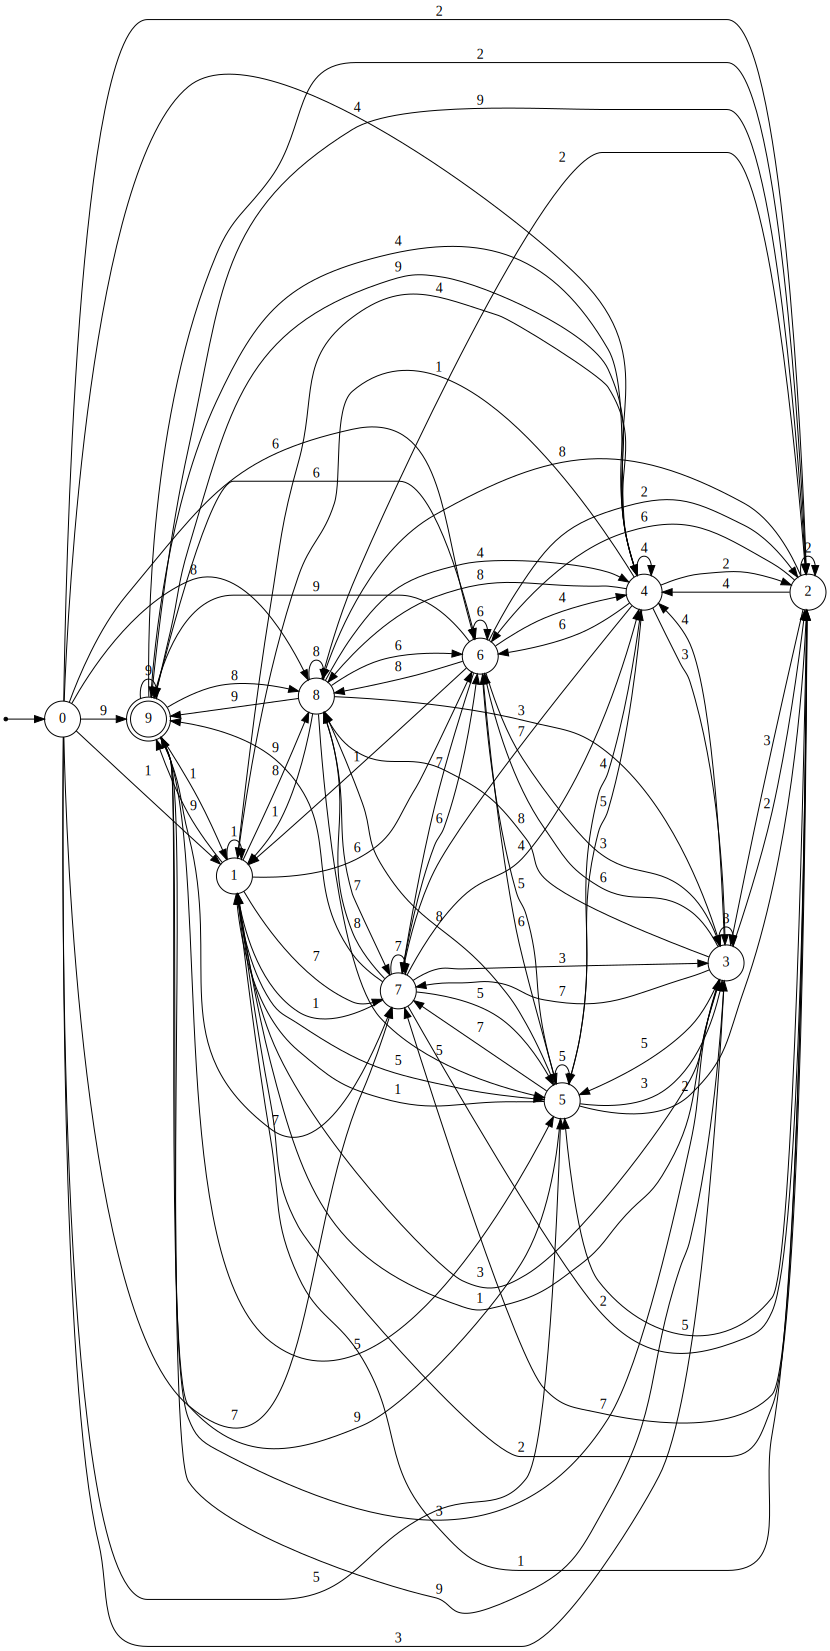

In [6]:
n_estados = 10
Q1 = {q for q in range(0, n_estados)}
Sigma1 = {s for s in range(1,n_estados)}
delta1 = ({(q,s):s for q in Q1 for s in Sigma1})
q01 = 0
F1 = {n_estados - 1}

M1 = AFD(Q1,Sigma1,delta1,q01,F1)
M1

Em outro exemplo, podemos ter um alfabeto composto por três símbolos: `não`, `aceite`, `isso`. Além disso, podemos usar as estruturas de repetição do Python para nos auxiliar na definição da função de transição.

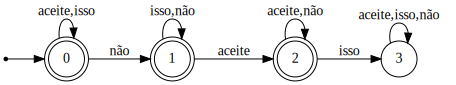

In [7]:
Q2 = {0,1,2,3}
Sigma2 = {"não", "aceite", "isso"}
delta2 = {}
delta2[0,"não"] = 1
delta2[1,"aceite"] = 2
delta2[2,"isso"] = 3
for q in Q2:
  for a in Sigma2:
    delta2[q,a] = q if not (q,a) in delta2 else delta2[q,a]
q02 = 0
F2 = {0,1,2}

M2 = AFD(Q2,Sigma2,delta2,q02,F2)
M2

É precisamos contudo ter cuidado contudo com o teste de aceitação, cuja entrada deve ser composta por uma sequência de símbolos presentes no alfabeto de entrada.

In [8]:
M2.aceita(("aceite","isso"))

True

In [9]:
M2.aceita(("não","aceite","isso"))

False

## Exercícios sobre AFDs

1. Defina um AFD $M$ que aceite a linguagem $L_1 = \{w \in \{a,b\}^* ~|~ w \text{ contém a cadeia } aab \}$.

In [10]:
# Insira aqui o código do seu AFD

2. Verifique se seu autômato $M$ aceita as cadeias $aab$, $aaabbb$ e $baabaa$, e se rejeita $ab$, $aaa$ e $\varepsilon$.

In [11]:
# Insira aqui os testes do seu AFD

# Autômato Finito Não-Determinístico

Os **autômatos finitos não-determinísticos** (AFN) são modelos de computação semelhantes aos autômatos finitos determinísticos, porém neste modelo a leitura de um símbolo em um determinado estado pode levar a várias escolhas de caminhos de computação.


Assim como para AFDs, graficamente descrevemos um AFD por meio de uma representação de estados ligados arestas rotuladas, que descrevem os elementos que motivam a transição de estados. Observe contudo que nem todas as transições precisam estar definidas, bem como existe também há a possibilidade de transicionar entre estados sem consumir símbolos da entrada, indicados na imagem pelo símbolo $\varepsilon$.


**Figura 2**: Exemplo de diagrama de estado de um AFN

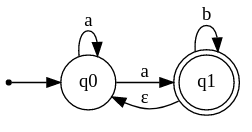

A Figura 2 representa um autômato com dois estados, `q0` e `q1`. O autômato inicia no estado `q0`, novamente indicado por uma seta sem origem em outro estado. Observe que diferente do AFD descrito na Figura 1, a leitura de um símbolo $a$ indica duas possibilidades para a atualização do estado do autômato: permanecer no estado `q0` ou mudar para o estado `q1`. A existência dessas possibilidades de caminhos é o que chamamos de **não-determinismo**.

Outro exemplo de não-determinismo está no estado `q1`. A transição $\varepsilon$ indica que existe a possibilidade de transitar para o estado `q0` sem que seja necessária consumir símbolos da entrada. O não-determinismo se configura assim por duas possibilidades: permanecer em `q1` e continuar a leitura da entrada; ou transitar para o estado `q0` e só então continuar com a leitura da entrada.



A definição formal de um AFN é semelhante a de AFD, exceto pela função de transição:

**Definição 2**: Um autômato finito não-determinístico é uma tupla $(Q, \Sigma, \delta, q_0, F)$, onde:
1. $Q$ é um conjunto finito de símbolos de estado,
1. $\Sigma$ é um conjunto finito de símbolos de alfabeto,
1. $\delta : Q \times \Sigma_\varepsilon \rightarrow \mathcal{P}(Q)$ é a função de transição,
1. $q_0 \in Q$ é o estado inicial, e
1. $F \subseteq Q$ é o conjunto de estados de aceitação.

onde $\Sigma_\varepsilon = \Sigma \cup \{\varepsilon\}$.

Podemos definir o AFN ilustrado na Figura 2 formalmente como $N = (\{q_0,q_1\}, \{a,b\}, \delta, q_0, \{q_1\})$, onde $\delta(q_0,a) = \{q_0,q_1\}, \delta(q_0,b) = \{\}, \delta(q_0,\varepsilon) = \{\}, \delta(q_1,a) = \{ \},$ $\delta(q_1,b) = \{q_1\} \text{ e } \delta(q_1,\varepsilon) = \{q_0\}$.

Seja $N = (Q, \Sigma, \delta, q_0, F)$ um AFN e $w = w_1w_2...w_n$ uma cadeia sobre $\Sigma_\varepsilon$, dizemos que $N$ **aceita** $w$ se existe uma sequência $(s_0,s_1,...,s_n)$ tal que
1. $s_0 = q_0$,
1. $s_{i+1} \in \delta(s_i,w_{i+1})$, para $0 \leq i < n$,
1. $s_n \in F$.

Por exemplo, o AFN $N$ ilustrado na Figura 2 aceita a cadeia $w = aabb$, dado que sequências como (q0, q_0, q1, q1) e (q0, q1, q0, q1, q1, q1) satisfazem as condições acima.

## Implementação em Python

Em nossa implementação, um autômato finito não-determinístico é representado pela classe `AFN`, cujo construtor segue a Definição 2:

>`N = AFN(Q,Sigma,delta,q0,F)`

A principal diferença para a construção de AFDs é que a função de transição `delta` deve ser um elemento do tipo `dict()` mapeando não mais para elementos de `Q`, e sim para um conjunto destes elementos. 

A seguir um exemplo de construção de AFN.

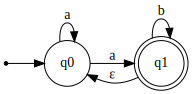

In [12]:
from teocomp.automata import AFN

Q = {'q0','q1'}
Sigma = {'a','b'}
delta = {('q0','a'):{'q0','q1'},
         ('q0','b'):{ },
         ('q1','b'):{'q1'},
         ('q1','' ):{'q0'}}
q0 = 'q0' 
F = {'q1'}

N = AFN(Q,Sigma,delta,q0,F)
N

Definido o autômato `N`, podemos usar a função `N.aceita(entrada)` para verificar a aceitação de cadeias, onde `entrada` deve ser composta por uma sequência de símbolos pertencentes a `Sigma`. A aceitação de uma palavra retornará o valor `True`.

In [13]:
N.aceita("aba")

True

A rejeição de uma palavra retornará o valor `False`.

In [14]:
N.aceita("babb")

False

Você pode também realizar múltiplos testes utilizando listas com casos de teste:

In [15]:
testes = [("ab",True), ("aab",True), ("abb",True), ("aabb",True), ("b",False), ("ba",False), ("bbb",False), ("",False)]
[N.aceita(entrada) == saida for entrada, saida in testes]

[True, True, True, True, True, True, True, True]

## Exercícios sobre AFNs

1. Defina um AFN $N$ que aceite a linguagem $L_2 = \{w \in \{a,b\}^* ~|~ w \text{ contém um número par de } a \text{ ou um número ímpar de } b\}$.

In [16]:
# Insira aqui o código do seu AFN

2. Verifique se seu autômato $N$ aceita as cadeias $aab$, $ab$ e $baabaa$, e se rejeita $a$, $aaa$ e $abb$.


In [17]:
# Insira aqui os testes do seu AFN

# Expressões Regulares

As **expressões regulares** (ER) são expressões utilizadas para descrever linguagens. Do mesmo modo que a expressão algébrica $2 \times (3 + 4)$ descreve o valor $14$, podemos definir uma expressão $(a~|~b)^*b$ para descrever a linguagem composta por todas as palavras terminadas em $b$.

Assim como as expressões algébricas, expressões regulares possuem regras de formação. A construção de uma ER é dado formalmente pela seguinte definição.

**Definição 3**: Seja $\Sigma$ um conjunto de símbolos de alfabeto, dizemos que $E$ é uma expressão regular sobre $\Sigma$ se $E$ for:
1. $a \in \Sigma$,
1. $\varepsilon$, representando a cadeia vazia,
1. $\emptyset$, representando a linguagem vazia,
1. $(E_1E_2)$, onde $E_1$ e $E_2$ são expressões regulares,
1. $(E_1 ~|~ E_2)$, onde $E_1$ e $E_2$ são expressões regulares,
1. $(E_1^*)$, onde $E_1$ é uma expressão regular.

As expressões regulares $a$, $\varepsilon$ e $\emptyset$ representam as linguagens $\{a\}$, $\{\varepsilon\}$ e \{ \}, respectivamente. As expressões $(E_1E_2)$ e $(E_1 ~|~ E_2)$ representam, respectivamente, a concatenação e união das linguagens definidas por $E_1$ e $E_2$. Por fim, a expressão $(E_1^*)$ representa o fecho estrela da linguagem definida por $E_1$, isto é, todas as possíveis concatenações das cadeias da linguagem definida por $E_1$.

Seja $\Sigma = \{a,b\}$, a expressão regular $E = ((a^*)b)$ definida sobre $\Sigma$ representa a linguagem

$$L(E) = \{b, ab, aab, aaab, aaaab, ...\}.$$

Para dar maior legibilidade a expressão, quando não houver ambiguidade, podemos omitir os parênteses da definição. Assim, $E = ((a^*)b)$ pode ser reescrita como $E=a^*b$.

## Implementação em Python

Em nossa implementação, uma expressão regular é representada pela classe `ER`, cujo construtor recebe uma entrada do tipo `str` representando a expressão segundo a definição Definição 3:

>`E = ER(string)`

Para definir a expressão regular $\emptyset$ não deve ser passado parâmetros para o construtor.

>`E = ER()`

Nossa implementação utiliza a biblioteca de expressões regulares padrão do *Python*. Para ver uso de caracteres especiais, veja a documentação da biblioteca [`re`](https://docs.python.org/3/library/re.html).


Exemplo de definição de expressão regular:

In [18]:
from teocomp.language import ER

E = ER("a(a|b)*b")
E

a(a|b)*b

Definida a expressão regular `E`, podemos usar a função `E.gera(entrada)` para verificar se cadeias pertencem a linguagem definida por `E`, onde `entrada` deve ser composta por uma sequência de símbolos pertencentes a `Sigma`. Caso pertença, a função retornará o valor `True`.

In [19]:
E.gera("ab")

True

Caso a entrada não pertença a linguagem definida por $E$, a função retornará o valor `False`.

In [20]:
E.gera("ba")

False

Como antes, você pode também realizar múltiplos testes utilizando listas com casos de teste:

In [21]:
testes = [("ab",True), ("aab",True), ("abb",True), ("aabb",True), ("b",False), ("ba",False), ("bbb",False), ("",False)]
[E.gera(entrada) == saida for entrada, saida in testes]

[True, True, True, True, True, True, True, True]

## Exercícios sobre ERs


1. Defina uma ER $E$ que represente a linguagem $L_3 = \{w \in \{a,b\}^* ~|~ w \text{ todo } a \text{ é precedido por um } b\}$.


In [22]:
# Insira aqui o código da sua ER

2. Verifique se sua expressão regular gera as cadeias $ba$, $babb$ e $babab$, e não gera $a$, $ab$ e $baa$.


In [23]:
# Insira aqui os testes da sua ER

# Autômato de Pilha

Os **autômatos de pilha** (AP) são modelos de computação que possuem uma memória do tipo FILO (*first in, last out*), fazendo analogia a uma pilha de objetos, onde só podemos ter acesso aquele que está no topo.

Nesse modelo, temos um alfabeto específico para a escrita nessa memória, chamado de *alfabeto de pilha*. As transições se assemelham àquelas dos autômatos finitos não-determinísticos, porém a ocorrência da transição também leva em conta a informação encontrada no topo da pilha de memória.

Assim como para AFNs, graficamente descrevemos um AP por meio de uma representação de estados ligados por arestas rotuladas. Utilizamos nessas arestas rótulos do tipo

$$a, b \rightarrow c$$

para indicar que para a transição ocorrer o autômato espera ler $a$ da entrada e ter $b$ no topo da pilha. Com a transição de estado, o autômato irá desempilhar $b$ e em seu lugar empilhar o símbolo $c$.

**Figura 3**: Exemplo de diagrama de estados de um AP.

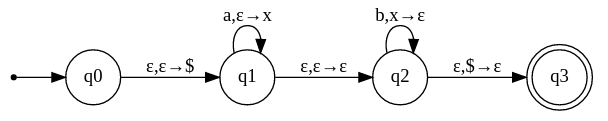

A Figura 3 representa um autômato de pilha com quatro estados, `q0`, `q1`, `q2` e `q3`. As transições indicam dois tipos de ações: leitura da entrada e leitura-escrita na pilha. A transição $a,\varepsilon \rightarrow x$, por exemplo, ocorre quando um símbolo $a$ é lido da entrada, sem que a pilha necessite ser consultada, indicado por $\varepsilon$. Ao realizar a transição o autômato permanecerá no estado `q0`, mas adicionará o símbolo $x$ no topo da pilha. Um funcionamento semelhante ocorre com a transição $b,x \rightarrow \varepsilon$.

Observe que neste exemplo o autômato só alcançará o estado de aceitação se desempilhar com leitura de $b$ todos os símbolos $x$ empilhados com leituras de $a$. Desse modo, o autômato da Figura 3 aceita a linguagem $\{a^nb^n ~|~ n \geq 0\}$.

A definição formal de um AP difere da definição de AFN pelo uso do alfabeto específico de pilha.

**Definição 4**: Um autômato de pilha é uma tupla $(Q, \Sigma, \Gamma, \delta, q_0, F)$, onde:
1. $Q$ é um conjunto finito de símbolos de estado,
1. $\Sigma$ é um conjunto finito de símbolos de alfabeto de entrada,
1. $\Gamma$ é um conjunto finito de símbolos de alfabeto de pilha,
1. $\delta : Q \times \Sigma_\varepsilon \times \Gamma_\varepsilon \rightarrow \mathcal{P}(Q \times \Gamma_\varepsilon)$ é a função de transição,
1. $q_0 \in Q$ é o estado inicial, e
1. $F \subseteq Q$ é o conjunto de estados de aceitação.

onde $\Sigma_\varepsilon = \Sigma \cup \{\varepsilon\}$ e $\Gamma_\varepsilon = \Gamma \cup \{\varepsilon\}$.

Podemos definir o AP ilustrado na Figura 3 formalmente como:

$$M = (\{q_0,q_1,q_2,q_3\}, \{a,b\}, \{\$,x\}, \delta, q_0, \{q_3\})$$

onde $\delta(q_0,\varepsilon,\varepsilon) = \{(q_1,\$)\}$, $\delta(q_1,a,\varepsilon) = \{(q_0,x)\}$, $\delta(q_1,\varepsilon,\varepsilon) = \{(q_2,\varepsilon)\}$, $\delta(q_2,b,x) = \{ (q_2,\varepsilon)\}$, $\delta(q_2,\varepsilon,\$) = \{(q_3,\varepsilon)\}$ e, nos demais casos, $\delta(q,r,s) = \{\}$.

Seja $M = (Q, \Sigma, \Gamma, \delta, q_0, F)$ um AP e $w = w_1w_2...w_n$ uma cadeia sobre $\Sigma_\varepsilon$, dizemos que $M$ aceita $w$ se existe uma sequência $(~(s_0,x_0), (s_1, x_1),...,(s_n,x_n)~)$ tal que $s_i \in Q$ e $x_i \in \Gamma^*$ e
1. $s_0 = q_0$ e $x_0 = \varepsilon$,
1. $(s_{i+1}, b) \in \delta(s_i,w_{i+1},a)$, para $0 \leq i < n$, onde $x_{i} = at$, $x_{i+1} = bt$, $t \in \Sigma^*$ e $a,b \in \Sigma_\varepsilon$,
1. $s_n \in F$.

Por exemplo, o AP $M$ ilustrado na Figura 4 aceita a cadeia $w = aabb$, dado que ( (q0, $\varepsilon$), (q0, $x$), (q0, $xx$), (q1, $xx$), (q1, $x$) ) satisfaz as condições acima. Não existe contudo uma sequência do tipo para a cadeia $baa$, e portanto ela não é aceita por $M$.

## Implementação em Python

Em nossa implementação, um autômato de pilha é representado pela classe `AP`, cujo construtor segue a Definição 4:

>`M = AP(Q,Sigma,Gamma,delta,q0,F)`

A principal diferença para a construção de AFNs é a indicação do alfabeto de pilha e que a função de transição `delta` deve ser um elemento do tipo `dict()` mapeando `estado-entrada-pilha` para um conjunto de pares `estado-pilha`.

Exemplo de construção de AP.

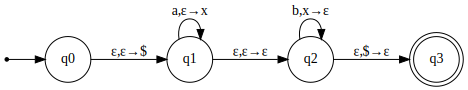

In [24]:
from teocomp.automata import AP

Q = {'q0','q1','q2','q3'}
Sigma = {'a','b'}
Gamma = {'$','x'}
delta = {('q0','' ,'' ):{('q1','$')},
         ('q1','a','' ):{('q1','x')},
         ('q1','' ,'' ):{('q2','' )},
         ('q2','b','x'):{('q2','' )},
         ('q2','' ,'$'):{('q3','' )}}
q0 = 'q0'
F = {'q3'}

M = AP(Q,Sigma,Gamma,delta,q0,F)
M

Definido o autômato `M`, podemos verificar a aceitação de cadeias por meio da função `M.aceita(entrada)`, onde `entrada` deve ser composta por uma sequência de símbolos pertencentes a `Sigma`. A aceitação de uma palavra retornará o valor `True`.

In [25]:
M.aceita("aabb")

True

A rejeição de uma palavra retornará o valor `False`.

In [26]:
M.aceita("aaabb")

False

Você pode também realizar múltiplos testes utilizando listas com casos de testes:

In [27]:
testes = [("",True), ("ab",True), ("aabb",True), ("aaabbb",True), ("b",False), ("ba",False), ("bbb",False), ("bbaa",False)]
[M.aceita(entrada) == saida for entrada, saida in testes]

[True, True, True, True, True, True, True, True]

## Exercícios sobre APs

1. Defina um AP $M$ que aceite a linguagem $L_4 = \{a^nb^m ~|~ n = 2m\}$.

In [28]:
# Defina aqui o código do seu AP

2. Verifique se seu autômato $M$ aceita as cadeias $\varepsilon$, $aab$ e $aaaabb$, e se rejeita $ab$, $aba$ e $aaabb$.

In [29]:
# Defina aqui os testes do seu AP

# Gramática Livre-do-Contexto

As **gramáticas livres-do-contexto** (GLC) são modelos de definição de linguagens por meio de regras de produção de palavras. Elas permitem expressar características recursivas de composição de sentenças, o que as tornam úteis em diversas aplicações, como nas definições de linguagens de programação.

As regras de produção são definidas sobre dois tipos de símbolos: símbolos que indicam possibilidades de produção, chamados de *variáveis*, e não substituíveis, chamados de *terminais*. Uma regra de produção é usualmente escrita na forma:

$$S \rightarrow aSb $$

O lado direito da regra deve conter um único símbolo variável e expressa que durante a produção de uma palavra, este símbolo pode ser substituído pela cadeia do lado direito, composta por variáveis e/ou terminais. No exemplo, a regra $S \rightarrow aSb $ indica que ao encontrar a variável $S$, esta pode ser substituída pela cadeia $aSb$.

> Usualmente denotamos os símbolos variáveis por letras maiúsculas e os símbolos terminais por letras minúsculas.


Uma GLC é formalmente definida como segue.

**Definição 5**: Uma gramática livre-do-contexto é uma tupla $(V,\Sigma,R,S)$, onde:
1. $V$ é um conjunto finito de símbolos variáveis,
1. $\Sigma$ é um conjunto finito de símbolos terminais,
1. $R \subseteq V \times (V \cup \Sigma)^*$ é um conjunto finito de regras,
1. $S \in V$ é a variável inicial.

Observe que formalmente um regra $A \rightarrow w$ é um par $(A, w) \in R$, que indica a possibilidade de substituição da variável $A \in V$ por uma cadeia $w \in (V \cup \Sigma)^*$.

Convencionamos representar as GLCs listando suas regras de produção no seguinte formato

$$\begin{align} 
S &\rightarrow A | B | \varepsilon \\
A &\rightarrow a | aAa | B \\
B &\rightarrow b | bBb | A
\end{align}$$ 

onde cada linha contém uma ou mais regras de uma mesma variável e a variável inicial está no lado esquedo da primeira linha.

Seja $G = (V, \Sigma, R, S)$ e $u,v \in (V \cup \Sigma)^*$ cadeias de variáveis e terminais, dizemos que
1. $u$ **produz** $v$, denotado por $u \Rightarrow v$, se $u = v$, ou $u = xAy$, $v = xwy$ e $(A, w) \in R$;
1. $u$ **deriva** $v$, denotado por $u \stackrel{*}{\Rightarrow} v $, se $u = v$, ou existe uma sequência $(u_1, u_2, ..., u_k)$ tal que $u \Rightarrow u_1 \Rightarrow u_2 ... \Rightarrow u_k \Rightarrow v$.
1. $G$ **gera** $v$ se $S$ deriva $v$.

A linguagem da gramática $G$ é dada pelo conjunto $L(G) = \{w \in \Sigma^* ~|~ G \text{ gera } w\}$.

## Implementação em Python

Em nossa implementação, uma gramática livre-do-contexto é representada pela classe `GLC`, cujo construtor segue a Definição 5:

>`G = GLC(V,Sigma,R,S)`


A seguir um exemplo de definição de gramática livre-do-contexto.

In [30]:
from teocomp.language import GLC

V = {'S'}
Sigma = {'a','b'}
R = {('S','aSb'),
     ('S','SS'),
     ('S','ab'),
     ('S','')}
S = 'S'

G = GLC(V,Sigma,R,S)
G


S → SS|aSb|ab|ɛ

Definida a GLC `G`, podemos usar a função `G.gera(entrada)` para verificar se cadeias pertencem a linguagem definida por `G`, onde `entrada` deve ser composta por uma sequência de símbolos pertencentes a `Sigma`. Caso pertença, a função retornará o valor `True`.

In [31]:
G.gera("ab")

True

Caso a entrada não pertença a linguagem definida por $G$, a função retornará o valor `False`.

In [32]:
G.gera("ba")

False

Como antes, você pode também realizar múltiplos testes utilizando listas com casos de testes:

In [33]:
testes = [("ab",True), ("aab",False), ("abb",False), ("aabb",True), ("b",False), ("ba",False), ("bbb",False), ("",False)]
[G.gera(entrada) == saida for entrada, saida in testes]

[True, True, True, True, True, True, True, False]

## Exercícios sobre GLCs

1. Defina uma GLC $G$ que represente a linguagem $L_5 = \{w \in \{a,b\}^* ~|~ w \text{ é um palíndromo}\}$.

In [34]:
# Insira aqui o código da sua GLC

2. Verifique se sua GLC gera as cadeias $aa$, $abba$ e $ababa$, e não gera $a$, $ab$ e $baa$.

In [35]:
# Insira aqui os testes da sua GLC

# Conclusão

Com isso, concluímos uma breve revisão dos principais modelos computacionais e de descrição de linguagens vistos em um curso de Linguagens Formais e Autômatos.

Alguns aspectos não puderam ser abordados, como propriedades das classes de linguagens, equivalência entre modelos e os lemas do bombeamento para linguagens regulares e linguagens livres-do-contexto. 

Recomendamos que o leitor continue seus estudos, há muitos temas interessantes ainda para serem vistos.

Sugerimos a leitura dos livros _**Introdução à Teoria da Computação**, de Michael Sipser_ (Thomson Learning, 2007) e _**Introdução à Teoria de Autômatos, Linguagens e Computação** de John E. Hopcroft, Jeffrey D. Ullman e  Rajeev Motwani_ (Campus, 2002). Bons estudos!